In [3]:
import os
from glob import glob
import numpy as np
import pandas as pd
import mne
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [212]:
#16
!gdown 1ecdGq4jsiPZvX-h2XtwdRno8xFvHUzYf
!gdown 1AXkRP3aHlq5MzNDvPLpKgF7kHimSG97m
!gdown 1dol4JX9gh5e2Z3UQvvxatrqi10mTF2Dc

Downloading...
From (uriginal): https://drive.google.com/uc?id=1ecdGq4jsiPZvX-h2XtwdRno8xFvHUzYf
From (redirected): https://drive.google.com/uc?id=1ecdGq4jsiPZvX-h2XtwdRno8xFvHUzYf&confirm=t&uuid=4af7fdc6-60ed-4d70-a959-abe45d40526f
To: /kaggle/working/session1_sub16_reaching_realMove.eeg
100%|██████████████████████████████████████| 1.25G/1.25G [00:21<00:00, 59.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AXkRP3aHlq5MzNDvPLpKgF7kHimSG97m
To: /kaggle/working/session1_sub16_reaching_realMove.vhdr
100%|██████████████████████████████████████| 12.9k/12.9k [00:00<00:00, 11.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dol4JX9gh5e2Z3UQvvxatrqi10mTF2Dc
To: /kaggle/working/session1_sub16_reaching_realMove.vmrk
100%|██████████████████████████████████████| 30.2k/30.2k [00:00<00:00, 15.5MB/s]


In [6]:
def read_data(path):
    data=path
    #reading accurately
    raw = mne.io.read_raw_brainvision(data, preload=True,eog=['hEOG_L','hEOG_R','vEOG_U','vEOG_D'])
    raw.drop_channels(['hEOG_L','hEOG_R','vEOG_U','vEOG_D','EMG_1','EMG_2','EMG_3','EMG_4','EMG_5','EMG_6','EMG_ref'])
    #take one leave one
    raw.resample(sfreq=1250)
    #filter
    raw.filter(l_freq=8, h_freq=30, method='iir', iir_params=dict(order=4, ftype='butter', output='sos'), phase='zero')

    #extract events
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[11, 21, 31, 41, 51, 61],tmin=-0.5,tmax=4,baseline=(-0.5,0))
    
    labels=epoch.events[:,-1]
    features=epoch.get_data()
    return features,labels
    #after you return
    # apply dwt or fourier
    #then extract fratures using entropy features or statstical featues  or csp
    #apply pca 
    #normalize 
    #hre we can select specific events to classify 
    #cnn or mlp or svm
    #confusion matrix + f measure

# so lets read all data


In [6]:
# all_file=glob(r'F:\mohamed\4th_year_new\GRAD project\mine data\d 2017\S01_ME\*.gdf')
# print(len(all_file))

In [7]:
# file_paths=[i for i in all_file]

In [8]:
# len(file_paths)

In [9]:
# file_paths.sort()

In [10]:
# data_array=[read_data(i) for i in file_paths]
# label_array=[read_data_label(i) for i in file_paths]

In [213]:
d1='/kaggle/working/session1_sub1_reaching_realMove.vhdr'
d2='/kaggle/working/session1_sub2_reaching_realMove.vhdr'  # problem
d3='/kaggle/working/session1_sub3_reaching_realMove.vhdr'  # problem
d4='/kaggle/working/session1_sub4_reaching_realMove.vhdr'
d5='/kaggle/working/session1_sub5_reaching_realMove.vhdr'
d11='/kaggle/working/session1_sub11_reaching_realMove.vhdr'
d15='/kaggle/working/session1_sub15_reaching_realMove.vhdr'

file_paths=[d15]

In [214]:
data_array,label_array=[],[]
for i in file_paths:
    features,labels=read_data(i) 
    data_array.append(features)
    label_array.append(labels)

Extracting parameters from /kaggle/working/session1_sub15_reaching_realMove.vhdr...
Setting channel info structure...
Reading 0 ... 8444399  =      0.000 ...  3377.760 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['Comment/actiCAP Active Shield On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']
Not setting metadata
300 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 300 events and 5626 

In [215]:
data_array[0].shape

(300, 60, 5626)

In [216]:
label_array[0].shape

(300,)

In [217]:
final_array=np.vstack(data_array)
final_label=np.hstack(label_array)

In [218]:
final_array.shape ,final_label.shape

((300, 60, 5626), (300,))

In [219]:
# import pywt
# from pywt import wavedec ,waverec

# wavelet = 'db4'
# level = 6
# # Perform the DWT
# coeffs = pywt.wavedec(final_array, wavelet, level=level)

# # cA6, cD6, cD5,cD4, cD3, cD2, cD1 =coeffs

# from pywt import wavedec ,waverec
# for i in range(1, level):
#     coeffs[i] = np.zeros_like(coeffs[i])

# # Reconstruct the signal from the modified coefficients
# filtered_signal = pywt.waverec(coeffs, 'db4')
# filtered_signal.shape

In [220]:
# #dwt finished successfully

# # # Calculate the power spectral density of the DWT coefficients
# power_spectrum = np.abs(filtered_signal) ** 2

# normalized_spectrum = power_spectrum / np.sum(power_spectrum)

# normalized_spectrum.shape

In [221]:
csp=mne.decoding.CSP(n_components=60)

In [222]:
# ex_data=csp.fit_transform(normalized_spectrum,final_label)
ex_data=csp.fit_transform(final_array,final_label)

Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 60 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 60 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 60 dim * 9.9e+09  max singular value)
    Estimated rank (mag): 60
    MAG: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 60 dim * 1e+10  max singular value)
  

In [223]:
ex_data.shape

(300, 60)

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(ex_data,final_label,test_size = 0.2,stratify=final_label,shuffle=True)#,stratify=final_label,shuffle=True

In [225]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay ,confusion_matrix
from sklearn.metrics import accuracy_score

svm_model=SVC()

svm_model.fit(X_train, y_train)

Y_pred = svm_model.predict(X_test)

In [226]:
print("Accuracy = {} ".format(accuracy_score(y_test,Y_pred)))

Accuracy = 0.26666666666666666 


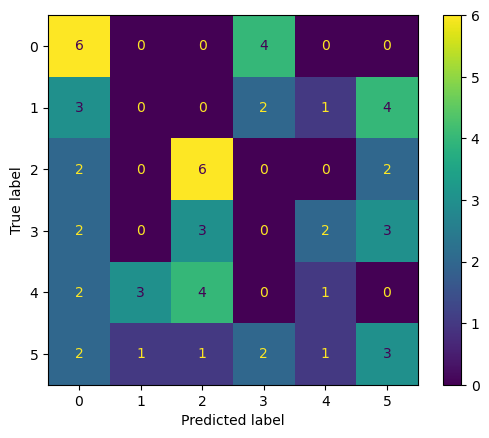

In [227]:
cm=confusion_matrix(y_test,Y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [228]:
# MLP(Multi layer perceptron)

In [235]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier()

mlp.fit(X_train,y_train)
Y_pred = mlp.predict(X_test)
print("Accuracy = {} ".format(accuracy_score(y_test,Y_pred)))

Accuracy = 0.6666666666666666 


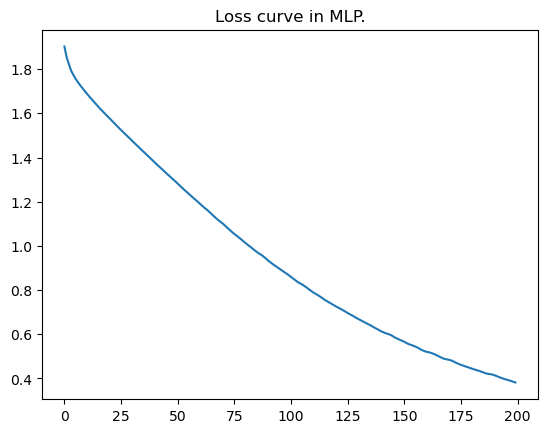

In [230]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.title("Loss curve in MLP.");

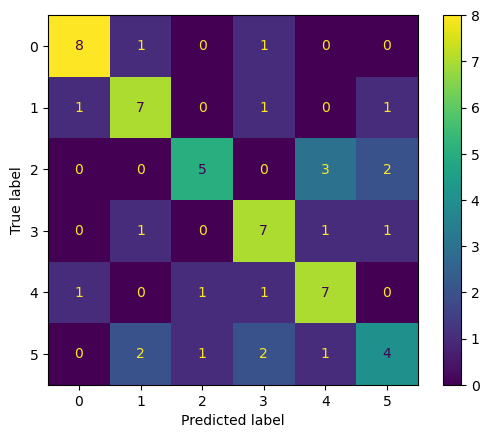

In [231]:
cm=confusion_matrix(y_test,Y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()